In [1]:
import pandas as pd

In [2]:
!ls

Receiver Operating Characteristics.ipynb
export-2019-06-10T04-15-16.905Z.csv
heat maps.ipynb
heat_maps_colab.ipynb
siyang.csv
siyang_90p.csv


In [3]:
data = pd.read_csv('export-2019-06-10T04-15-16.905Z.csv', header=None)

In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,ID,DataRow ID,Labeled Data,Label,Created By,Project Name,Created At,Updated At,Seconds to Label,External ID,Agreement,Benchmark Agreement,Benchmark ID,Benchmark Reference ID,Dataset Name,Reviews,View Label
1,cju91wr9i8hhe08175uuqgkrn,cju901nv2jwqs0bqp6e1ayhv7,https://storage.googleapis.com/labelbox-193903...,"{""click_if_text_visible"":""exit_sign_is_visible""}",manduchi@soe.ucsc.edu,Text spotting experiment,1554769991000,1554769991000,9.514,0.jpg,NaN,NaN,NaN,NaN,Text spotting experiment 2018,[],https://image-segmentation-v4.labelbox.com?pro...
2,cju91wuy08s8208711ndijlhu,cju901nv2jwqw0bqpixoh0x04,https://storage.googleapis.com/labelbox-193903...,"{""click_if_text_visible"":""exit_sign_is_visible""}",manduchi@soe.ucsc.edu,Text spotting experiment,1554769996000,1554769996000,4.597,1.jpg,NaN,NaN,NaN,NaN,Text spotting experiment 2018,[],https://image-segmentation-v4.labelbox.com?pro...
3,cju91wxgz8l8j0850ni5hnw6u,cju901nv2jwr00bqpmw2ruug3,https://storage.googleapis.com/labelbox-193903...,"{""click_if_text_visible"":""exit_sign_is_visible""}",manduchi@soe.ucsc.edu,Text spotting experiment,1554769999000,1554769999000,3.055,2.jpg,NaN,NaN,NaN,NaN,Text spotting experiment 2018,[],https://image-segmentation-v4.labelbox.com?pro...
4,cju91x0v98kfx07553osj40p5,cju901nv2jwr40bqp1k4rr2p3,https://storage.googleapis.com/labelbox-193903...,"{""click_if_text_visible"":""some_text_is_visible""}",manduchi@soe.ucsc.edu,Text spotting experiment,1554770004000,1554770004000,4.229,10.jpg,NaN,NaN,NaN,NaN,Text spotting experiment 2018,[],https://image-segmentation-v4.labelbox.com?pro...


In [5]:
data[3].head()

0                                               Label
1    {"click_if_text_visible":"exit_sign_is_visible"}
2    {"click_if_text_visible":"exit_sign_is_visible"}
3    {"click_if_text_visible":"exit_sign_is_visible"}
4    {"click_if_text_visible":"some_text_is_visible"}
Name: 3, dtype: object

In [6]:
label = data[3]

In [7]:
label.describe()

count                                                  939
unique                                                   8
top       {"click_if_text_visible":"some_text_is_visible"}
freq                                                   468
Name: 3, dtype: object

In [8]:
label.unique()

array(['Label', '{"click_if_text_visible":"exit_sign_is_visible"}',
       '{"click_if_text_visible":"some_text_is_visible"}', 'Skip',
       '{"click_if_text_visible":"no_text__or_exit_sign_visible"}',
       '{"check_the_appropriate_button":"no_text__or_exit_sign_visible"}',
       '{"check_the_appropriate_button":"exit_sign_is_visible"}',
       '{"check_the_appropriate_button":"some_text_is_visible"}'],
      dtype=object)

In [9]:
image = data[9]

In [10]:
image.head() 

0    External ID
1          0.jpg
2          1.jpg
3          2.jpg
4         10.jpg
Name: 9, dtype: object

In [11]:
ground_truth={}
for i in range(1,939):
    ground_truth[image[i]] = label[i]


In [12]:
# ground_truth

In [13]:
siyangdata = pd.read_csv('siyang.csv', header=None)

In [14]:
siyangdata.describe()

,1
count,552.000000
mean,12.556159
std,20.406854
min,0.000000
25%,0.000000
50%,0.000000
75%,16.000000
max,160.000000


In [15]:
image = siyangdata[0]
siyangresult = siyangdata[1]

In [24]:
siyang={}
for i in range(1,len(siyangdata)):
    siyang[image[i]] = siyangresult[i]

# Intersection of Siyang_image and Ground_truth

In [17]:
siyangdata_name =siyangdata[0]
siyangdata_name = [int(w.replace('.jpg','')) for w in siyangdata_name]
siyangdata_name.sort()

In [18]:
ground_truth_name = data[9]
ground_truth_name= ground_truth_name.drop([0])
ground_truth_name = [int(w.replace('.jpg','')) for w in ground_truth_name]
ground_truth_name.sort()

In [19]:
intersection =set(siyangdata_name).intersection(set(ground_truth_name))

In [20]:
intersection_siyang_ground_truth = list(intersection)

In [21]:
intersection_siyang_ground_truth =[str(str(w)+ '.jpg') for w in intersection_siyang_ground_truth]

In [22]:
len(intersection_siyang_ground_truth)

552

# ROC for siyang

 For each image, if the largest connected component is larger than N, then it found text in the image (N here is a parameter). You compute the TPR and FPR for that value of N. You can thus create a ROC curve with the TPR vs FPR values as N changes from 1 to 500 (you will have 500 points on the curve). After you generate the curve, you are done. 


In [33]:
FPR_S = []
TPR_S = []
for N in range(1,162):
    F =[]
    T =[]
    for i in intersection_siyang_ground_truth:
        c = siyang.get(i)
        if c != None:
            if c >= N and ground_truth.get(i) == 'Skip':
                F.append(i)   
            if c >= N and ground_truth.get(i) != 'Skip':
                T.append(i) 
        FPR = len(set(F))
        TPR = len(set(T))
    FPR_S.append(FPR)
    TPR_S.append(TPR)
        

In [ ]:
'''
        if siyang.get(i) >= N and ground_truth.get(i) == 'Skip':
            F.append(i)   
        if siyang.get(i) >= N and ground_truth.get(i) != 'Skip':
            T.append(i) 
        FPR = len(set(F))
        TPR = len(set(T))
    FPR_S.append(FPR)
    TPR_S.append(TPR)''''

In [34]:
print(FPR_S)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [35]:
FPR_S.count(1)

24

In [36]:
print(TPR_S)

[273, 272, 267, 256, 247, 244, 241, 239, 209, 201, 196, 196, 196, 183, 183, 183, 134, 125, 123, 123, 123, 123, 123, 123, 99, 92, 90, 90, 88, 88, 88, 88, 61, 54, 52, 51, 51, 50, 50, 49, 44, 43, 43, 43, 43, 43, 43, 43, 31, 27, 26, 26, 26, 26, 26, 26, 24, 23, 21, 21, 21, 21, 21, 21, 17, 13, 13, 13, 13, 13, 13, 13, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]


In [37]:
total = len(intersection_siyang_ground_truth)

In [46]:
skip = []
for i in intersection_siyang_ground_truth:
    if ground_truth.get(i) == 'Skip':
        print(i,ground_truth.get(i))
        skip.append(i)

137.jpg Skip
138.jpg Skip
139.jpg Skip
140.jpg Skip
141.jpg Skip
142.jpg Skip
143.jpg Skip
144.jpg Skip
145.jpg Skip
146.jpg Skip
147.jpg Skip
148.jpg Skip
149.jpg Skip
150.jpg Skip
151.jpg Skip
152.jpg Skip
153.jpg Skip
154.jpg Skip
155.jpg Skip
156.jpg Skip
157.jpg Skip
160.jpg Skip
161.jpg Skip
162.jpg Skip
164.jpg Skip
165.jpg Skip
166.jpg Skip
167.jpg Skip
168.jpg Skip
169.jpg Skip
170.jpg Skip
171.jpg Skip
172.jpg Skip
173.jpg Skip
174.jpg Skip
175.jpg Skip
176.jpg Skip
177.jpg Skip
178.jpg Skip
179.jpg Skip
180.jpg Skip
181.jpg Skip
182.jpg Skip
183.jpg Skip
184.jpg Skip
185.jpg Skip
186.jpg Skip
187.jpg Skip
188.jpg Skip
189.jpg Skip
190.jpg Skip
191.jpg Skip
192.jpg Skip


In [54]:
len(skip)

53

In [57]:
for i in skip:
    print(siyang.get(i))
    if siyang.get(i) != 0: print(i)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
24
166.jpg
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [39]:
#siyang.get('166.jpg')

In [40]:
#for i in intersection_siyang_ground_truth:
    #print(i,ground_truth.get(i))

In [49]:
F_n = [x / total for x in FPR_S]
T_n = [x / total for x in TPR_S]

In [50]:
F_n

[0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0018115942028985507,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [51]:
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

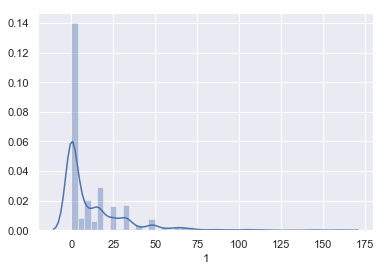

In [52]:
sns.distplot(siyangresult)

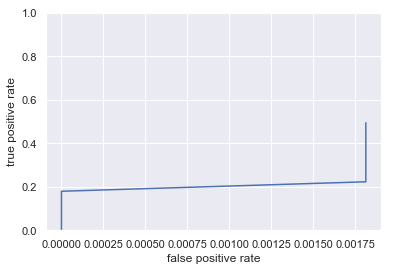

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
x = F_n
y = T_n
plt.plot(x, y) 
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.ylim(0,1)
plt.show()

In [ ]:
import csv


w = csv.writer(open("siyang_intersection", "w"))
for key, val in siyang.items():
    w.writerow([key, val])


